## 물고기 무게를 예측하기 위한 다항회귀 모델
### 1) 패키지 참조

In [1]:
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame, merge
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

### 2) 데이터셋 준비

In [2]:
origin = read_excel('https://data.hossam.kr/F02/fish2.xlsx')
origin

,길이,높이,두께,무게
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0
5,18.0,5.22,3.32,100.0
6,18.7,5.20,3.12,78.0
7,19.0,5.64,3.05,80.0
8,19.6,5.14,3.04,85.0
9,20.0,5.08,2.77,85.0


### 3) 데이터 전처리
- 결측치 확인

In [3]:
origin.isna().sum()

길이    0
높이    0
두께    0
무게    0
dtype: int64

- 타입 확인

In [4]:
origin.dtypes

길이    float64
높이    float64
두께    float64
무게    float64
dtype: object

### 4) 탐색적 데이터 분석
- 기본 통계 확인, 박스플롯 확인

In [5]:
origin.describe()

,길이,높이,두께,무게
count,56.000000,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536,382.239286
std,9.021668,2.878343,1.775006,347.617717
min,8.400000,2.110000,1.410000,5.900000
25%,21.825000,5.690000,3.520000,120.000000
50%,25.300000,6.920000,4.155000,207.500000
75%,36.625000,10.850000,6.450000,692.500000
max,44.000000,12.800000,8.140000,1100.000000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

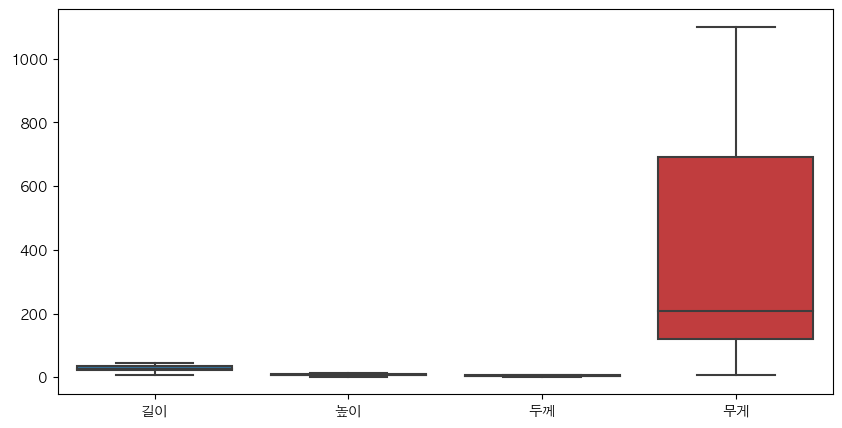

In [6]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (10, 5))
sb.boxplot(data = origin)
plt.show()
plt.close()

> 데이터의 분포가 상이하고 이상치는 없으므로 RobustScaler가 아닌 StandardScaler로 표준화가 필요해 보인다

- 산점도 행렬 그래프와 추세선 확인

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

<Figure size 3000x3000 with 0 Axes>

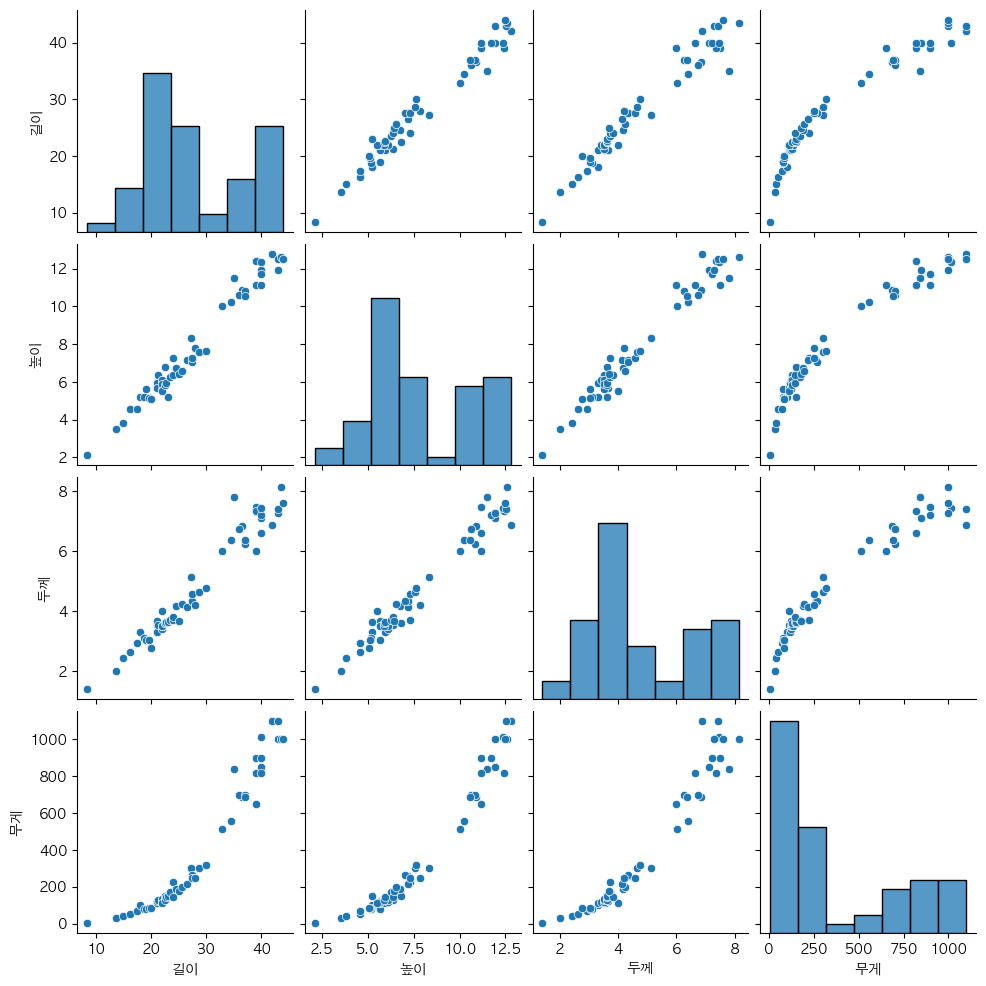

In [7]:
plt.figure(figsize = (30, 30))
sb.pairplot(origin)
plt.show()
plt.close()

> 다중공선성이 보이므로 길이, 높이, 두께 중 하나만 측정해도 되나 예제이므로 전체를 포함한다.
### 5) 데이터셋 분할
- 랜덤시드 고정

In [8]:
np.random.seed(777)

- 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

In [9]:
x = origin[['길이', '높이', '두께']]
x.head()
y = origin[['무게']]
y.head()

,무게
0,5.9
1,32.0
2,40.0
3,51.5
4,70.0


- 데이터 표준화 및 데이터프레임으로 재구성
    - ** 다항식 변환 시 표준화 후 다항식으로 변환하는 것이 훨씬 결과가 좋다

In [10]:
x_scaler = StandardScaler()
x_scale = x_scaler.fit_transform(x)
x_scale_df = DataFrame(x_scale, columns=x.columns)
x_scale_df

y_scaler = StandardScaler()
y_scale = y_scaler.fit_transform(y)
y_scale_df = DataFrame(y_scale, columns=y.columns)
y_scale_df

x_scale.shape, y_scale.shape

((56, 3), (56, 1))

- 훈련 데이터(독립변수)를 다항식으로 변환하기

In [11]:
# polynomial features라는 클래스의 my_poly 객체 생성
my_poly = PolynomialFeatures(degree = 2, include_bias = False)
# 독립변수들만 추린 데이터프레임을 .fit_transform() 함수에 전달해서 학습을 시킴
my_fit = my_poly.fit_transform(x_scale_df)
my_fit
# 2차항을 갖고 있는 데이터프레임 생성
x2_scale_df = DataFrame(my_fit, columns=my_poly.get_feature_names_out())
x2_scale_df.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
0,-2.180225,-2.016507,-1.896175,4.753381,4.396440,4.134088,4.066302,3.823651,3.595479
1,-1.587434,-1.518703,-1.560774,2.519946,2.410841,2.477625,2.306460,2.370352,2.436014
2,-1.442032,-1.417039,-1.316328,2.079457,2.043416,1.898188,2.008000,1.865289,1.732721
3,-1.307815,-1.147103,-1.202633,1.710381,1.500199,1.572822,1.315845,1.379544,1.446326
4,-1.173599,-1.147103,-1.026405,1.377334,1.346238,1.204588,1.315845,1.177393,1.053508


- 표준화 전/후 상자그림 비교 (표준화가 잘 되었는지 확인)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

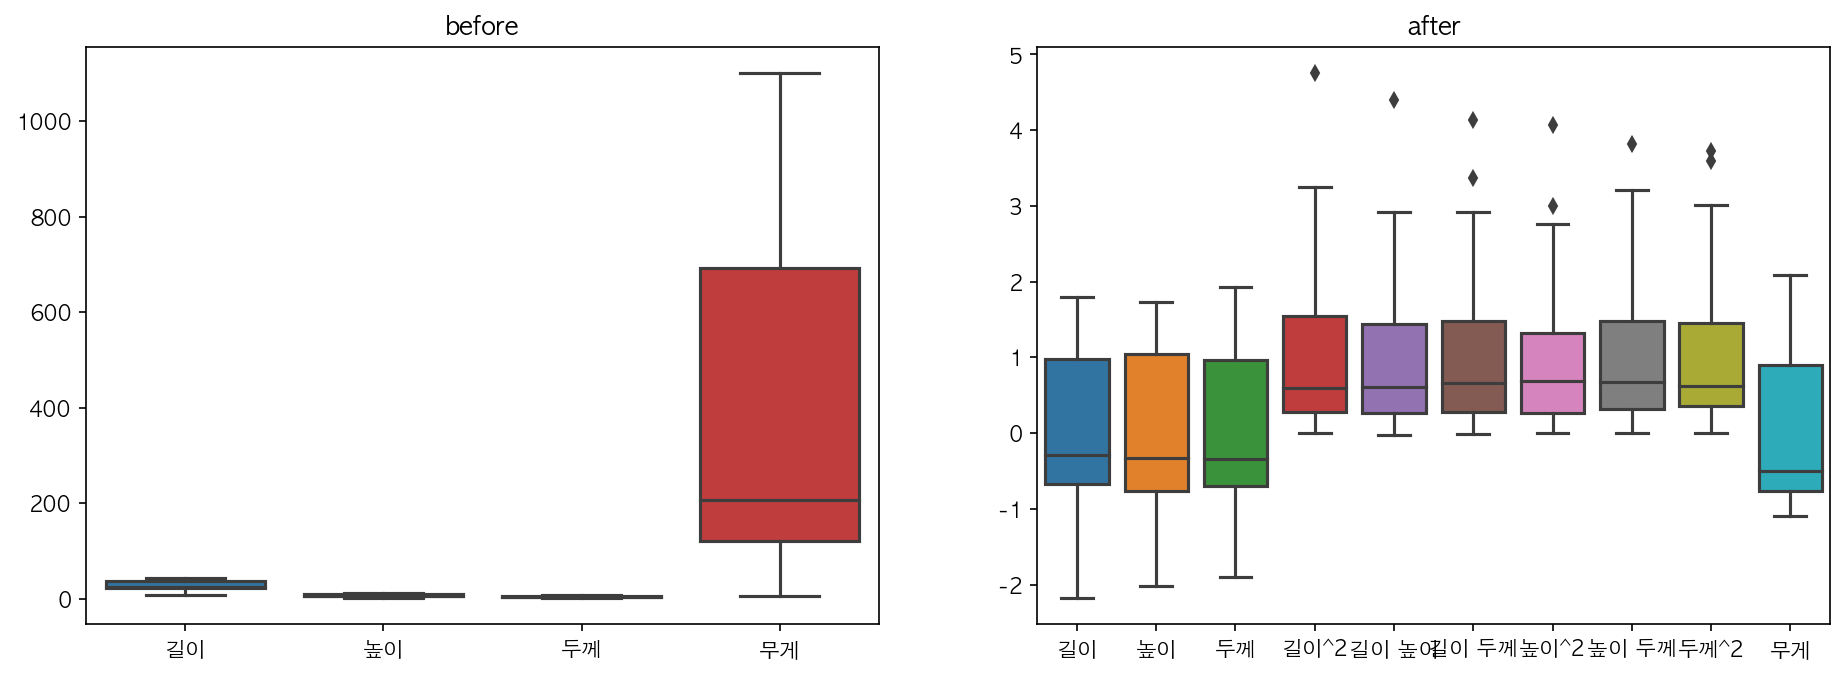

In [12]:
# 임시로 독립변수와 종속변수를 하나의 DataFrame으로 병합
tmp = merge(x2_scale_df, y_scale_df, left_index=True, right_index=True)

fig, ax = plt.subplots(1, 2, figsize = (15, 5), dpi=150)
sb.boxplot(data=origin, ax=ax[0])
sb.boxplot(data=tmp, ax=ax[1])
ax[0].set_title('before')
ax[1].set_title('after')
plt.show()
plt.close()

- 훈련 데이터와 검증 데이터 분할

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x2_scale_df,
                                                    y_scale_df,
                                                    test_size=0.3,
                                                    random_state=777)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39, 9), (17, 9), (39, 1), (17, 1))

### 6) 모델 개발
- 모델 정의
    - 데이터가 `단순하고 개수가 적다`면 `과(대)적합이 발생할 확률이 높고`, 또한 `Dense 층을 많이 쌓을수록` `과적합이 발생할 확률이 높`기 때문에 또한 주의하면서 적절한 크기와 모델층을 쌓아야 한다

In [14]:
my_model = Sequential()

my_model.add(Dense(64, activation='relu', input_shape=(len(x_train.iloc[0]),)))
    # x_train[0] 대신 x_train.iloc[0] 한 이유: 형태가 데이터프레임이므로 iloc를 걸어줘야 길이가 조회가 되기 때문
my_model.add(Dense(32, activation='relu'))
my_model.add(Dense(1, activation = 'linear'))
my_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 학습하기

In [15]:
result = my_model.fit(x_train,
                      y_train,
                      epochs=500,
                      validation_data = (x_test, y_test),
                      callbacks=[EarlyStopping(monitor='val_loss',
                                               patience=10,
                                               verbose=1),
                                 ReduceLROnPlateau(monitor='val_loss',
                                                   patience=3,
                                                   factor=0.5,
                                                   min_lr=0.001,
                                                   verbose=1
                                                   )])

Epoch 1/500
2/2 [==============================] - 0s 129ms/step - loss: 0.6542 - mae: 0.6702 - val_loss: 0.3074 - val_mae: 0.5009 - lr: 0.0010
Epoch 2/500
2/2 [==============================] - 0s 20ms/step - loss: 0.4224 - mae: 0.5629 - val_loss: 0.1986 - val_mae: 0.4134 - lr: 0.0010
Epoch 3/500
2/2 [==============================] - 0s 20ms/step - loss: 0.2649 - mae: 0.4571 - val_loss: 0.1222 - val_mae: 0.3259 - lr: 0.0010
Epoch 4/500
2/2 [==============================] - 0s 20ms/step - loss: 0.1597 - mae: 0.3552 - val_loss: 0.0726 - val_mae: 0.2441 - lr: 0.0010
Epoch 5/500
2/2 [==============================] - 0s 20ms/step - loss: 0.1001 - mae: 0.2845 - val_loss: 0.0487 - val_mae: 0.2079 - lr: 0.0010
Epoch 6/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0608 - mae: 0.2123 - val_loss: 0.0411 - val_mae: 0.1809 - lr: 0.0010
Epoch 7/500
2/2 [==============================] - 0s 20ms/step - loss: 0.0456 - mae: 0.1782 - val_loss: 0.0435 - val_mae: 0.1605 - lr: 0.001

### 7) 학습 결과 평가
- 학습결과 확인

In [16]:
result_df = DataFrame(result.history)
result_df['epochs']=result_df.index+1
result_df.set_index(keys='epochs', inplace=True)
result_df

,loss,mae,val_loss,val_mae,lr
epochs,,,,,
1,0.654221,0.670183,0.307365,0.500874,0.001
2,0.422387,0.562938,0.198604,0.413392,0.001
3,0.264931,0.457144,0.122169,0.325875,0.001
4,0.159710,0.355200,0.072559,0.244098,0.001
5,0.100124,0.284544,0.048678,0.207938,0.001
6,0.060762,0.212277,0.041081,0.180886,0.001
7,0.045639,0.178180,0.043545,0.160457,0.001
8,0.049170,0.176719,0.047376,0.152074,0.001
9,0.052482,0.181648,0.048804,0.146318,0.001


- 학습 결과 시각화

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

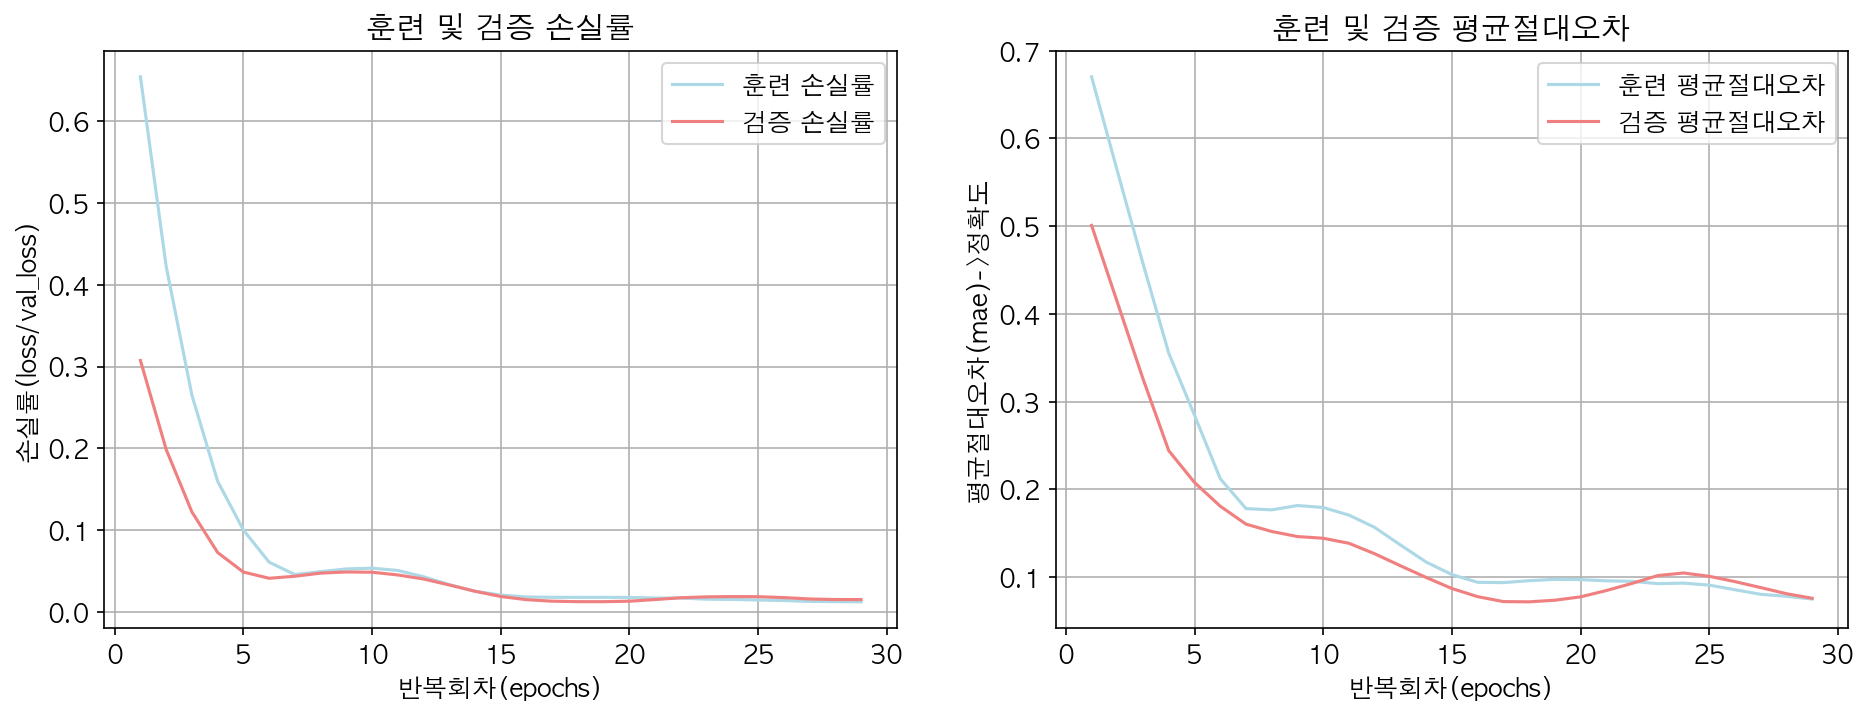

In [17]:
# 그래프 기본 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
sb.lineplot(x=result_df.index,
            y='loss',
            data= result_df,
            color='lightblue',
            label='훈련 손실률',
            ax=ax1)
sb.lineplot(x=result_df.index,
            y='val_loss',
            data= result_df,
            color='lightcoral',
            label='검증 손실률',
            ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차(epochs)')
ax1.set_ylabel('손실률(loss/val_loss)')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 평균절대오차 그리기
sb.lineplot(x=result_df.index,
            y='mae',
            data=result_df,
            color='lightblue',
            label='훈련 평균절대오차',
            ax=ax2)
sb.lineplot(x=result_df.index,
            y='val_mae',
            data=result_df,
            color='lightcoral',
            label='검증 평균절대오차',
            ax=ax2)
ax2.set_title('훈련 및 검증 평균절대오차')
ax2.set_xlabel('반복회차(epochs)')
ax2.set_ylabel('평균절대오차(mae)->정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

- 모델 성능 평가

In [18]:
evaluate1 = my_model.evaluate(x_train, y_train)
print('최종 훈련 손실률: %f, 최종 훈련 절대오차: %f' % (evaluate1[0], evaluate1[1]))
evaluate2 = my_model.evaluate(x_test, y_test)
print('최종 검증 손실률: %f, 최종 검증 절대오차: %f' % (evaluate2[0], evaluate2[1]))

2/2 [==============================] - 0s 3ms/step - loss: 0.0118 - mae: 0.0753
최종 훈련 손실률: 0.011808, 최종 훈련 절대오차: 0.075277
1/1 [==============================] - 0s 23ms/step - loss: 0.0151 - mae: 0.0760
최종 검증 손실률: 0.015074, 최종 검증 절대오차: 0.075987


### 8) 학습 결과 적용
- 예측 결과 산정

In [19]:
train_predict = my_model.predict(x_train)
test_predict = my_model.predict(x_test)

1/1 [==============================] - 0s 15ms/step


- 결과 데이터셋 구성: 
    - 훈련데이터와 검증데이터의 크기(행 수 -> 7대 3)가 다르기 때문에 이 둘을 데이터프레임으로 결합 못한다
    - -> 배열 크기가 다르다고 에러가 날 것
    - 그러므로 훈련데이터 셋과 검증데이터 셋을 따로 만들어야 된다

In [20]:
train_df = DataFrame(x_train, columns=x_train.columns)
train_df['무게(관측치)']=y_train
train_df['무게(예측치)']=train_predict
train_df['훈련오차'] = train_df['무게(관측치)']-train_df['무게(예측치)']
train_df.head()

test_df = DataFrame(x_test, columns=x_train.columns)
test_df['무게(관측치)']=y_test
test_df['무게(예측치)']=test_predict
test_df['훈련오차'] = test_df['무게(관측치)']-test_df['무게(예측치)']
test_df.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2,무게(관측치),무게(예측치),훈련오차
16,-0.659101,-0.614242,-0.696689,0.434414,0.404847,0.459188,0.377294,0.427936,0.485375,-0.732189,-0.739429,0.007239
12,-0.770948,-0.761480,-0.611417,0.594361,0.587062,0.471371,0.579852,0.465582,0.373831,-0.746703,-0.746042,-0.000661
21,-0.580807,-0.670333,-0.634156,0.337337,0.389334,0.368323,0.449346,0.425096,0.402154,-0.688648,-0.741189,0.052541
33,-0.043940,-0.204080,-0.099788,0.001931,0.008967,0.004385,0.041649,0.020365,0.009958,-0.383859,-0.279211,-0.104647
36,0.235678,-0.084887,0.013907,0.055544,-0.020006,0.003278,0.007206,-0.001181,0.000193,-0.180666,-0.208813,0.028147


- 실제 결과값(관측치)과 머신러닝에 의한 예측값 비교

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

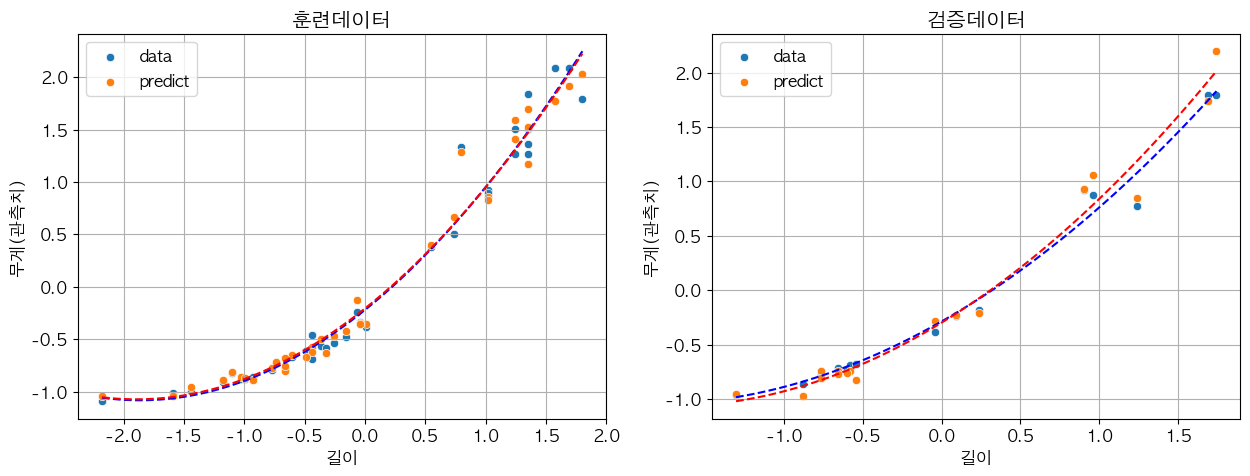

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

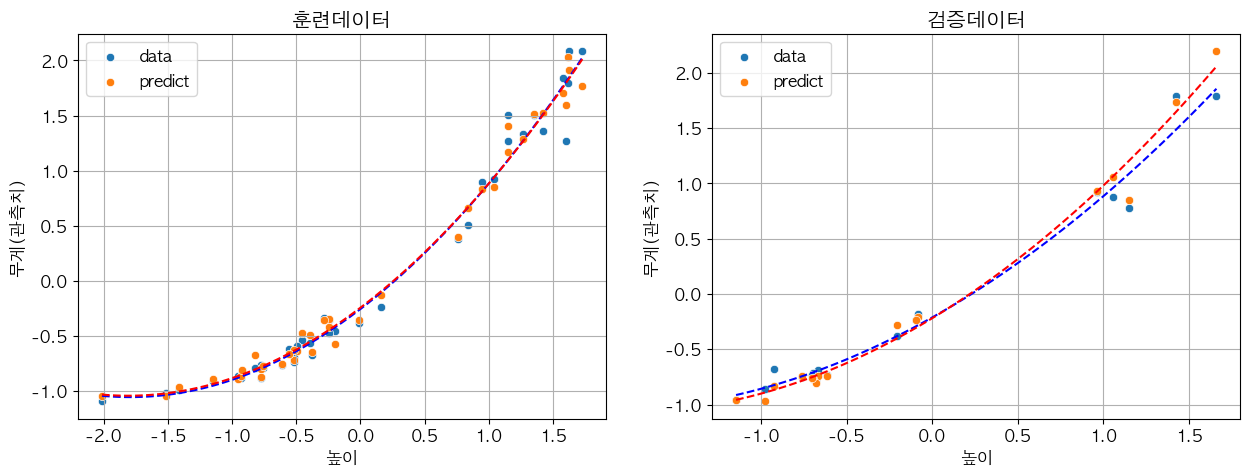

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

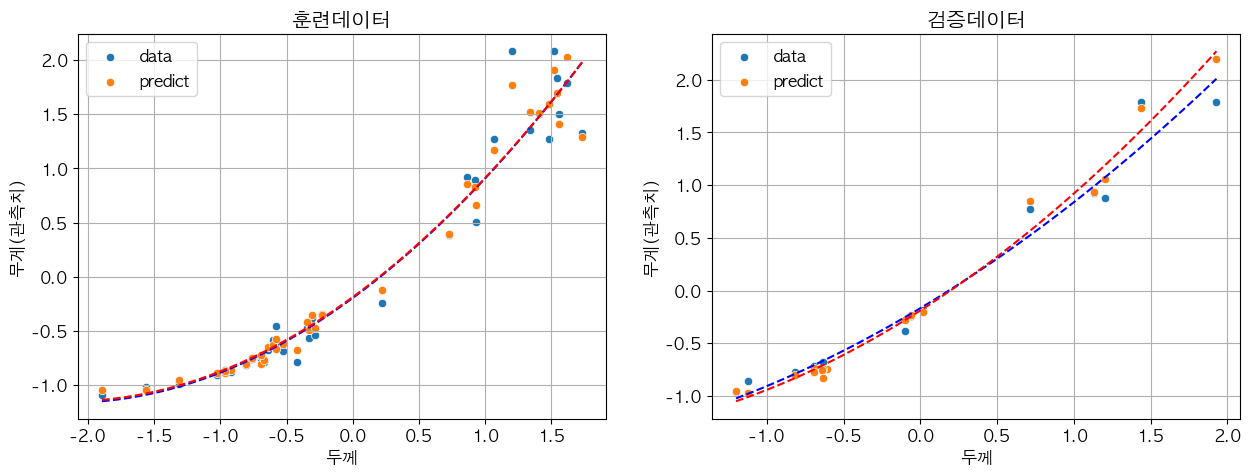

In [21]:
for key in ['길이', '높이', '두께']:
    helper.regplot(train_df[key],
                   train_df['무게(관측치)'],
                   train_df['무게(예측치)'],
                   '훈련데이터',
                   test_df[key], 
                   test_df['무게(관측치)'],
                   test_df['무게(예측치)'],
                   '검증데이터',
                   figsize=(15,5))